<a href="https://colab.research.google.com/github/PeixotoJr/APD/blob/main/Classificacao_Peguim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar os dados
data = pd.read_csv('penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Limpar os dados
data.dropna(inplace=True)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
# Definir características e rótulo
X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']]
y = data['species']

In [ ]:
# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
# Selecionar uma árvore do modelo
estimator = model.estimators_[0]  # Escolhendo a primeira árvore do ensemble

In [ ]:
# Exportar a árvore para um arquivo dot
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=X.columns,
                           class_names=model.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

In [ ]:
# Criar um gráfico com Graphviz
graph = graphviz.Source(dot_data)
graph.render('penguin_tree', format='png', cleanup=True)  # Salva como arquivo PNG
graph.view()  # Abre a visualização do gráfico

'penguin_tree.pdf'

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

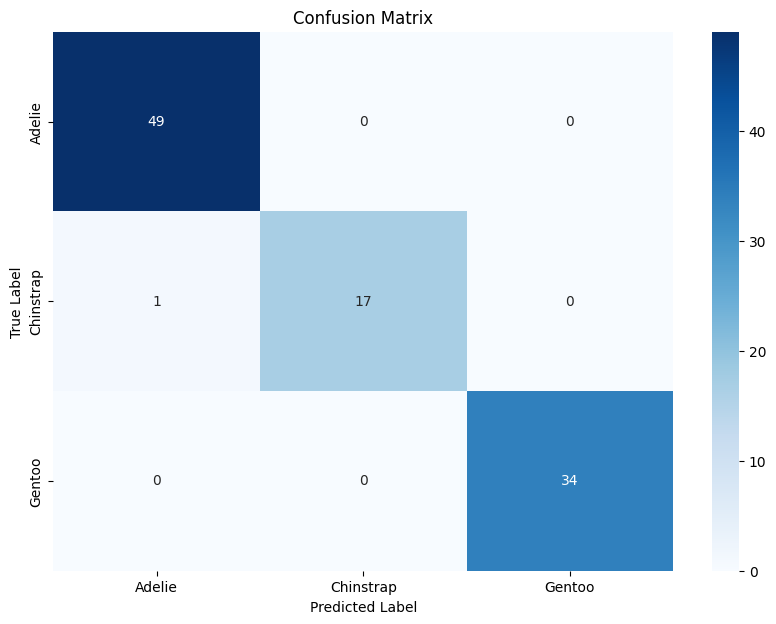

In [ ]:
# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#rio de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        49
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       101
   macro avg       0.99      0.98      0.99       101
weighted avg       0.99      0.99      0.99       101

